In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# setting style
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# reading in data set
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## About the dataset  

The dataset show several features namely:  
* Pregnancies amounts  
* Glucose Levels  
* Blood Pressure  
* Skin Thickness  
* Insulin  
* Body Mass Index (BMI)  
* Diabetes Pedigree Function   
* Age of patient  
* Outcome (whether the patient has diabetes(1) or not(0)  

The goal is to create a machine learning algorithm that can accurately predict if a patient has diabetes. The model should thus have a high recall rate (probability of detection). For this example, a K-Nearest Neighbor Classifier would be used.  


## Data Preprocessing and intial analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# shape of dataset
df.shape

(768, 9)

In [5]:
# identify missing values 
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### From the above table, BMI, Glucose, BloodPressure, SkinThickness can't be zero. Thus replace with mean or drop row.   
**However, Insulin values have a zero value but this possible because some patients may not be able to produce insulin**

In [7]:
# show rows and columns of dataframe where skin thickness = 0
df[df['SkinThickness']==0].shape

(227, 9)

In [8]:
# show rows and columns of dataframe where BMI = 0
df[df['BMI']==0].shape

(11, 9)

In [9]:
# show rows and columns of dataframe where blood pressure = 0
df[df['BloodPressure']==0].shape

(35, 9)

In [10]:
# show rows and columns of dataframe where glucose = 0
df[df['Glucose']==0].shape

(5, 9)

### Drop rows that have missing glucose and BMI values   -  'Glucose', 'BMI'
### Calculate mean and replace 0 values   - 'BloodPressure', 'SkinThickness'

In [11]:
# copy dataframe
new_df = df.copy(deep=True)
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# replace 0 values with np.nan
new_df['BMI'].replace(0, np.nan, inplace = True)
new_df['Glucose'].replace(0, np.nan, inplace=True)

# drop rows
new_df.dropna(axis=0, subset=['BMI', 'Glucose', 'Insulin', 'SkinThickness'], inplace=True)
print('BMI Shape: ', new_df[new_df['BMI']==0].shape)
print('Glucose Shape: ', new_df[new_df['Glucose']==0].shape)

BMI Shape:  (0, 9)
Glucose Shape:  (0, 9)


In [13]:
# calculating averages
skin_avg = new_df['SkinThickness'].mean()
blood_avg = new_df['BloodPressure'].mean()

# replacing null values with the mean
new_df['SkinThickness'].replace(0, skin_avg, inplace = True)
new_df['BloodPressure'].replace(0, blood_avg, inplace = True)

new_df.shape

(752, 9)

In [14]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,752.0,3.851064,3.375189,0.000,1.000000,3.000,6.0000,17.00
Glucose,752.0,121.941489,30.601198,44.000,99.750000,117.000,141.0000,199.00
BloodPressure,752.0,72.300178,12.157628,24.000,64.000000,72.000,80.0000,122.00
SkinThickness,752.0,26.720695,9.648926,7.000,20.715426,23.000,32.0000,99.00
Insulin,752.0,81.348404,115.925034,0.000,0.000000,39.000,130.0000,846.00
BMI,752.0,32.454654,6.928926,18.200,27.500000,32.300,36.6000,67.10
DiabetesPedigreeFunction,752.0,0.473051,0.330108,0.078,0.244000,0.377,0.6275,2.42
Age,752.0,33.312500,11.709395,21.000,24.000000,29.000,41.0000,81.00
Outcome,752.0,0.351064,0.477621,0.000,0.000000,0.000,1.0000,1.00


# Exploratory Data Analysis

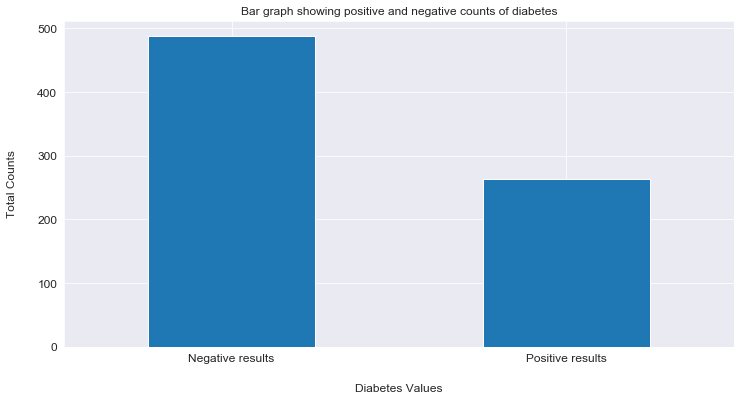

0    65.104167
1    34.895833
Name: Outcome, dtype: float64


In [15]:
# exploring outcome - diabetes=1, negative=0
fig, ax1 = plt.subplots(figsize=(12,6))
new_df['Outcome'].value_counts().plot(kind='bar',
                                     title='Bar graph showing positive and negative counts of diabetes',
                                     fontsize=12);

# labels on x axis
plt.xlabel('Diabetes Values', 
           fontsize=12, 
           labelpad=20)
# labels on y axis
plt.ylabel("Total Counts", 
           fontsize=12, 
           labelpad=20)
# changing values of xticks
ax1.set_xticklabels(['Negative results', 'Positive results'], 
                    rotation=0)
plt.show()
print(df['Outcome'].value_counts(normalize=True) * 100)

**From the above chart, patients tend to have diabetes 34.89% of the time.**

### Visualizing Positive and Negative outcomes by age and glucose levels

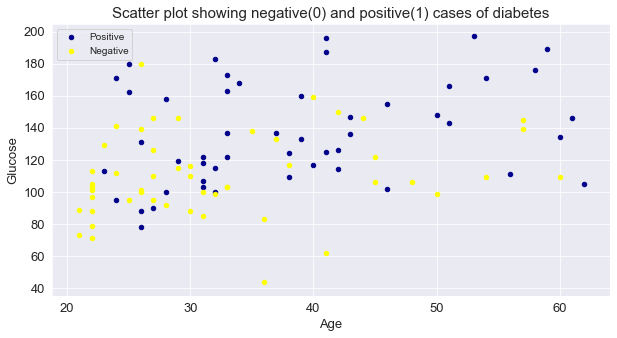

In [118]:
# plotting positive outcome of diabetes (blue)
ax1 = new_df[new_df['Outcome'] == 1][0:50].plot(kind='scatter',
                                      x='Age',
                                      y='Glucose',
                                      color='DarkBlue', 
                                      label='Positive',
                                      figsize=(10,5),
                                      fontsize=13);
# plotting negative outcome of diabetes (yellow)
new_df[new_df['Outcome'] == 0][0:50].plot(kind='scatter',
                                x='Age',
                                y='Glucose',
                                color='Yellow', 
                                label='Negative', 
                                ax=ax1);
plt.title('Scatter plot showing negative(0) and positive(1) cases of diabetes', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Glucose', fontsize=13)
plt.show()

In [16]:
# correlations with outcome
new_df.corr()['Outcome'].sort_values()

Insulin                     0.130203
BloodPressure               0.159447
SkinThickness               0.171703
DiabetesPedigreeFunction    0.178052
Pregnancies                 0.213371
Age                         0.232734
BMI                         0.309884
Glucose                     0.494190
Outcome                     1.000000
Name: Outcome, dtype: float64

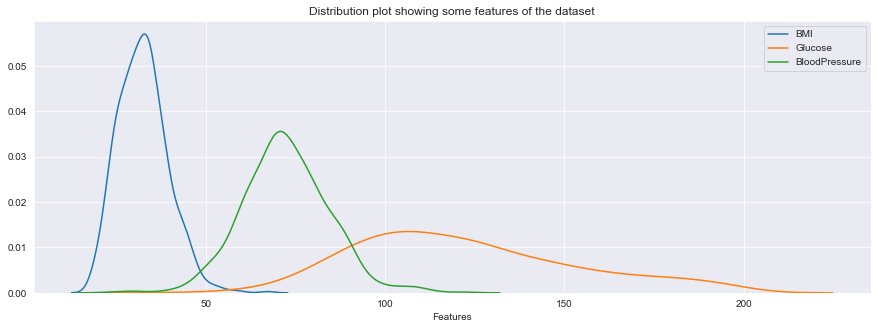

In [17]:
# distribution plots of a few of the features
plt.figure(figsize=(15,5));
ax1 = sns.distplot(new_df['BMI'], hist=False, label='BMI');
sns.distplot(new_df['Glucose'], ax=ax1, hist=False, label='Glucose')
sns.distplot(new_df['BloodPressure'], ax=ax1, hist=False, label='BloodPressure')
plt.title('Distribution plot showing some features of the dataset')
plt.xlabel('Features')
plt.show()

## Data will need to be normalized

# Building the model

In [20]:
# import necessary libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# importing necessary metric libraries
from sklearn.metrics import recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix, roc_curve

### Feature Selection

In [23]:
# feature values 
X = new_df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']]
# target value
Y = new_df['Outcome'].values

print(X.shape, Y.shape)

(752, 5) (752,)


### Splitting Dataset

In [24]:
# creating training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(564, 5) (564,)
(188, 5) (188,)


### Normalizing Data

In [25]:
# normalizing data for accurate results
# creating scale object 
scale = MinMaxScaler()
# fit and transforms on training data
x_train_scaled = scale.fit_transform(x_train)
# transforming testing data
x_test_scaled = scale.transform(x_test)

### Finding optimum n_neighbors

In [33]:
# determining best value for n_neighbors, keeping in mind that recall score has to be prioritized
ks = 15
recall = np.zeros(15)
acc_test = np.zeros(15)
acc_train = np.zeros(15)
roc = np.zeros(15)
# initializing varibale i
i = 0

for k in range(1,ks):
    
    # knn object
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting model with training set
    knn.fit(x_train_scaled, y_train)
    # predictions
    yhat = knn.predict(x_test_scaled)
    
    # metrics
    recall[i] = recall_score(y_test, yhat)
    acc_test[i] = knn.score(x_test_scaled, y_test)
    acc_train[i] = knn.score(x_train_scaled, y_train)
    roc[i] = roc_auc_score(y_test, yhat)
    i += 1

In [39]:
# showing best value for k. Add one to compensate for indexing
print('Best K based on recall: ', recall.argmax() + 1)
print('Best K based on ROC score: ', roc.argmax() + 1)
print('Best K based on accuracy: ', acc_test.argmax() + 1)
print('\nRecall Scores: ', recall)
print('\nROC Scores: ', roc)
print('\nAccuracy Scores: ', acc_test)

Best K based on recall:  5
Best K based on ROC score:  9
Best K based on accuracy:  14

Recall Scores:  [0.6779661  0.44067797 0.66101695 0.55932203 0.71186441 0.61016949
 0.66101695 0.57627119 0.71186441 0.61016949 0.6779661  0.59322034
 0.66101695 0.62711864 0.        ]

ROC Scores:  [0.71495204 0.65444751 0.71810537 0.70989358 0.74740507 0.72756537
 0.71810537 0.71449218 0.75515701 0.7353173  0.74208383 0.71521482
 0.73748522 0.74379188 0.        ]

Accuracy Scores:  [0.7287234  0.73404255 0.7393617  0.76595745 0.7606383  0.7712766
 0.7393617  0.76595745 0.7712766  0.78191489 0.76595745 0.7606383
 0.76595745 0.78723404 0.        ]


#### Note on above cell   

Where k=5: 

* Recall: 71.186%  
* ROC: 74.75%   
* Accuracy: 76.06%

Where k=9:  

* Recall: 71.186%  
* ROC: 75.515%  
* Accuracy: 77.771%  

Where k=14:  

* Recall: 62.711%  
* ROC: 74.379%  
* Accuracy: 78.72%   

**Final Observation on metric**  

According to the requirements, the algorithm should be optimized in terms of the recall rate and roc score. Since the recall score is equal where k=5 and k=9, we should use the maximum roc score which would be at k=9. The accuracy at this point is only 1 percent under the max accuracy meaning that not much accuracy is sacrificed in finding optimum recall and roc scores.  

Build final model using k=9 neighbors.

### Visualize accuracy with increasing k values

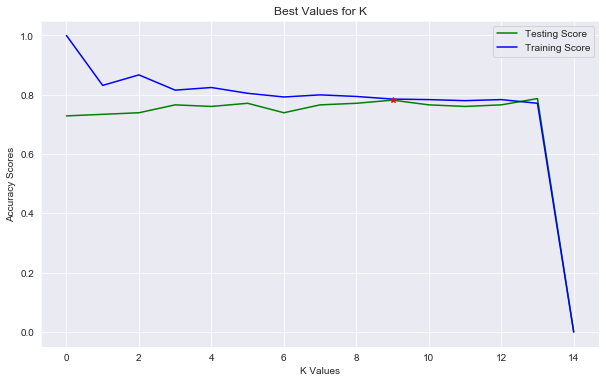

In [62]:
# visualise training and testing data
fig, ax1 = plt.subplots(figsize=(10, 6));
sns.lineplot(range(ks), acc_test, color='g', label='Testing Score', ax=ax1)
sns.lineplot(range(ks), acc_train, color='b', label='Training Score', ax=ax1)
# plotting point where k=9
plt.plot(9, acc_test[9], 'r*')
plt.title('Best Values for K')
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.show()

### Building Final Model with K=9

In [67]:
# knn object
knn = KNeighborsClassifier(n_neighbors=9)
# fitting knn object
knn.fit(x_train_scaled, y_train)
# predicting 
yhat = knn.predict(x_test_scaled)
# predicting probability
yhat_proba = knn.predict_proba(x_test_scaled)[:,1]

### Evaluating Model

In [74]:
# accuracy
acc_final = round(knn.score(x_test_scaled, y_test) * 100, 4)
# recall score
recall_final = round(recall_score(y_test, yhat) * 100, 4)
# roc score
roc_final = round(roc_auc_score(y_test, yhat) * 100, 4)

print('Accuracy: ', acc_final, '%')
print('Recall: ', recall_final, '%')
print('ROC: ', roc_final, '%')

Accuracy:  77.1277 %
Recall:  71.1864 %
ROC:  75.5157 %


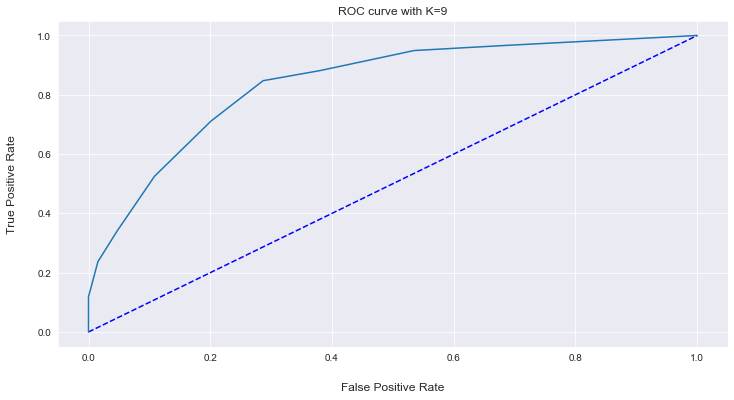

In [78]:
# showing roc_auc_curve
fpr, tpr, thresholds = roc_curve(y_test, yhat_proba)

# plotting roc_auc_curve
fig, ax1 = plt.subplots(figsize=(12,6));
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr, tpr)
# labels on x axis
plt.xlabel('False Positive Rate', 
           fontsize=12, 
           labelpad=20)
# labels on y axis
plt.ylabel("True Positive Rate", 
           fontsize=12, 
           labelpad=20)
plt.title('ROC curve with K=9')
plt.show()

*The area under of the curve scores at 75.5%, this could be increased by better feature selection or tuning parameters of the model. GridSearchCV can achieve this

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       129
           1       0.62      0.71      0.66        59

    accuracy                           0.77       188
   macro avg       0.74      0.76      0.74       188
weighted avg       0.78      0.77      0.78       188

AxesSubplot(0.125,0.125;0.62x0.755)


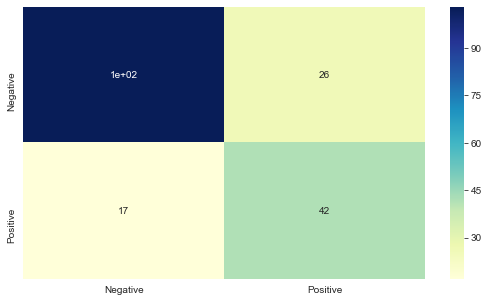

In [82]:
# confusion matrix
matrix = confusion_matrix(y_test, yhat)
# heatmap for matrix
plt.figure(figsize=(9,5));
hmap = sns.heatmap(pd.DataFrame(matrix), 
                   annot=True, 
                   fmt='.2g',
                   xticklabels=['Negative', 'Positive'],
                   cmap='YlGnBu',
                   yticklabels=['Negative', 'Positive']);

report = classification_report(y_test, yhat)
print(report)
print(hmap)

# Conclusion on model   

Overall the models performance is considered average. It is optimized for the recall and roc scores since the target variable is predicting diabetes in patients. 

**Final Metrics**

* Accuracy:  77.1277 %
* Recall:  71.1864 %
* ROC:  75.5157 %   


*Now compare GridSearchCV Scores*

In [83]:
# importing GridSearchCV 
from sklearn.model_selection import GridSearchCV

In [114]:
# creating knn object for gridsearch
knn_grid = KNeighborsClassifier()

# parameters to enter into GridSearch
parameters = {'n_neighbors': np.arange(1,50)}

# building gridsearch model
grid = GridSearchCV(knn_grid, 
                    param_grid=parameters, 
                    cv=5,
                    scoring='recall',
                    iid=False)
# fitting model
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [115]:
# prediction
yhat_grid = grid.predict(x_test_scaled)

# best parameters
best_k_grid = grid.best_params_
# best accuracy score
best_k_acc = round(grid.score(x_test_scaled, y_test) * 100, 4)
# best roc score
best_k_roc = round(roc_auc_score(y_test, yhat_grid) * 100, 4)
# best recall score
best_k_recall = round(recall_score(y_test, yhat_grid) * 100, 4)

In [116]:
print('Best value for K: ', best_k_grid, '%')
print('Best accuracy for K: ', best_k_acc, '%')
print('Best roc score for K: ', best_k_roc, '%')
print('Best recall score for K: ', best_k_recall, '%')

Best value for K:  {'n_neighbors': 9} %
Best accuracy for K:  71.1864 %
Best roc score for K:  75.5157 %
Best recall score for K:  71.1864 %


# Evaluating GridSearch and initial KNN results  

## Both found that k=9 optimizes the results  


## Accuracy Test:  
* KNN Accuracy: 77.12%  
* Grid Accuracy: 71.18%  
  
## Recall Score:   
* KNN Recall: 71.186%  
* Grid Recall: 71.186%  

# ROC  
* KNN ROC: 75.51%  
* Grid ROC: 75.51%   

### Using GridSearch, we found that the recall and roc scores are equivalent. Our models is performing optimally, however, since this is an important medical situation, a different classification model such as (SVM, LogisticRegression) should be used in order to increase the probabilty of detection (recall rate). 